In [1251]:
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

video_path = os.path.join('heart-attack-video/', 'Heart_attack_explanation.mp4')
ipd.Video(video_path, width=700, embed=True)

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('heart_attack_prediction_dataset.csv')
attributes = data.columns
print(attributes)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


### Data Understanding
The dataset consists of 8763 individuals data. There are 14 columns in the dataset, which are described below:

**Patient ID** - Unique identifier for each patient<br>
No relationship with heart attack risk;

**Age** - Age of the patient<br>
Higher age is often associated with an increased risk of heart attack.

**Sex** - Sex of the patient (Male/Female)<br>
Some studies show no relationship between sex and risk of heart attack, while others claim that males have a higher risk than females.

**Cholesterol** - Cholesterol levels of the patient<br>
High cholesterol is a risk factor for heart attacks.

**Blood Pressure** - Blood pressure of the patient (systolic/diastolic)<br>
High blood pressure is a risk factor for heart attacks.

**Heart Rate** - Heart rate of the patient<br>
Abnormal heart rates can indicate heart problems.

**Diabetes** - Whether the patient has diabetes (Yes/No)<br>
Diabetes is a significant risk factor for heart attacks.

**Family History** - Family history of heart-related problems (1: Yes, 0: No)<br>
Family history can indicate genetic risk factors.

**Smoking** - Smoking status of the patient (1: Smoker, 0: Non-smoker)<br>
Smoking is a known risk factor for heart attacks.

**Obesity** - Obesity status of the patient (1: Obese, 0: Not obese)<br>
Obesity is a risk factor for heart attacks.

**Alcohol Consumption** - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)<br>
Excessive alcohol can increase the risk.

**Exercise Hours Per Week** - Number of exercise hours per week<br>
Regular exercise can reduce the risk.

**Diet** - Dietary habits of the patient (Healthy/Average/Unhealthy)<br>
Diet can impact heart health.

**Previous Heart Problems** - Previous heart problems of the patient (1: Yes, 0: No)<br>
A history of heart problems can indicate increased risk.

**Medication Use** - Medication usage by the patient (1: Yes, 0: No)<br>
Medications may affect heart health.

**Stress Level** - Stress level reported by the patient (1-10)<br>
High stress levels can be a risk factor.

**Sedentary Hours Per Day** - Hours of sedentary activity per day<br>
Sedentary lifestyle can increase the risk.

**Income** - Income level of the patient<br>
Income may indirectly affect lifestyle choices that impact risk.

**BMI** - Body Mass Index (BMI) of the patient<br>
Higher BMI can increase heart attack risk.

**Triglycerides** - Triglyceride levels of the patient<br>
High triglyceride levels are a risk factor.

**Physical Activity Days Per Week** - Days of physical activity per week<br>
Regular physical activity can reduce risk.

**Sleep Hours Per Day** - Hours of sleep per day<br>
Inadequate or excessive sleep can affect heart health.

**Country** - Country of the patient<br>
Country of residence may influence lifestyle and healthcare access.

**Continent** - Continent where the patient resides<br>
Continent may reflect regional health trends.

**Hemisphere** - Hemisphere where the patient resides<br>
Hemisphere may also reflect regional health trends.

**Heart Attack Risk** - Presence of heart attack risk (1: Yes, 0: No)<br>
The target variable indicating the presence or absence of heart attack risk.

### Data Exploration
#### All columns

In [1252]:
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [1253]:
total_rows = data.shape[0]
print("Total Number of Rows:", total_rows)

Total Number of Rows: 8763


We had initially chosen another dataset, but which only contained 300 rows. We are therefore pleased that this one contains more than 8,000 rows, because we feel that this will enable us to study the issue of heart attacks properly. However, we'll be checking later whether the dataset is balanced or not, despite the large number of lines.
##### Missing values

In [1254]:
missing_values = data.isnull().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


*There are no missing values in any of the attributes. So there are no lines to delete or fill in.*
##### Duplicated values

In [1255]:
duplicates=data.duplicated()
### Check if all rows are unique
duplicated_rows=data[data.duplicated()]
print(len(duplicated_rows))

0


*There are no duplicated rows in the dataset. So there are no lines to delete.*
#### ID column
##### Type and senseless values

In [1256]:
print(data['Patient ID'].dtype)
### Check if all identifiers are unique
print(len(data) - len(data['Patient ID'].unique()))

object
0


*All the ids are unique, so we don't have duplicated users.<br>
This attribute does not provide us with any information for the rest of the project, so we are going to delete it.*

In [1257]:
data.drop(columns=['Patient ID'], inplace=True)

#### Age column
##### Type

In [1258]:
print(data['Age'].dtype)

int64


*Age has a numerical type which is what we want.*
##### Senseless values and Repartition

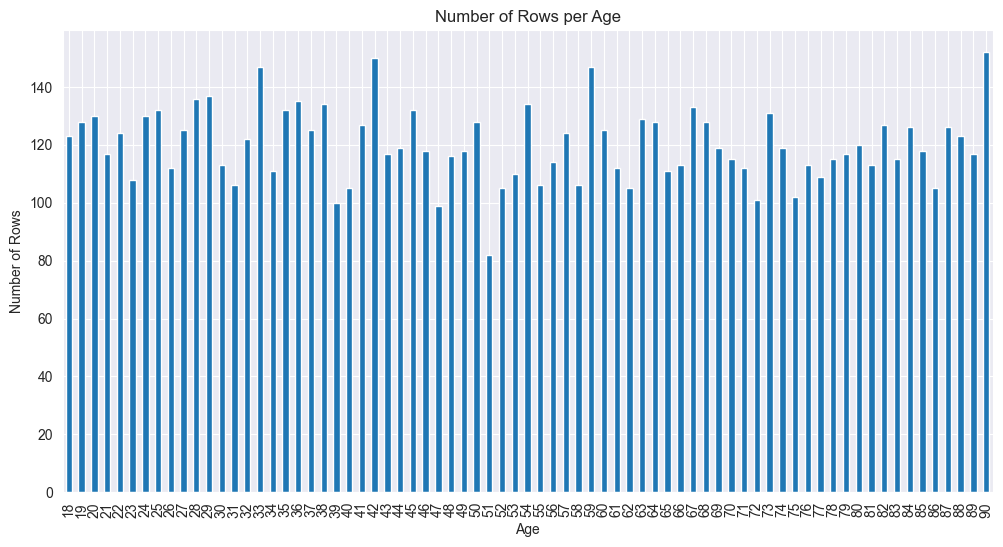

In [1259]:
age_counts = data['Age'].value_counts()
age_counts = age_counts.sort_index()
plt.figure(figsize=(12, 6))
age_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Age')
plt.show()

*We can note that the age column has no senseless values, since these are between 18 and 90 years old.
The repartition between the category is quite well-balanced.*

##### Link with heart attack risk

In [1260]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Age'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

       No Risk       Risk
Age                      
18   66.666667  33.333333
19   68.750000  31.250000
20   70.000000  30.000000
21   64.957265  35.042735
22   67.741935  32.258065
..         ...        ...
86   56.190476  43.809524
87   57.142857  42.857143
88   66.666667  33.333333
89   63.247863  36.752137
90   63.815789  36.184211

[73 rows x 2 columns]


TODO INTERPRETATION
#### Sex column
##### Type and senseless values

In [1261]:
print(data['Sex'].dtype)
sex = data['Sex'].unique()
print(sex)

object
['Male' 'Female']


*We can note that the sex column has no senseless values, since these are 2 correct values
For the rest, it is preferable to change the sex type to numerical values.*

In [1262]:
#make Sex numerical
# Create an empty dictionary to store the mapping
sex_mapping = {}
# Iterate over unique sexes and assign numerical values from 0 to 1
for i in range(len(sex)):
    sex_mapping[sex[i]] = i
# Map the 'Sex' column using the created mapping
data['Sex'] = data['Sex'].map(sex_mapping)

##### Repartition

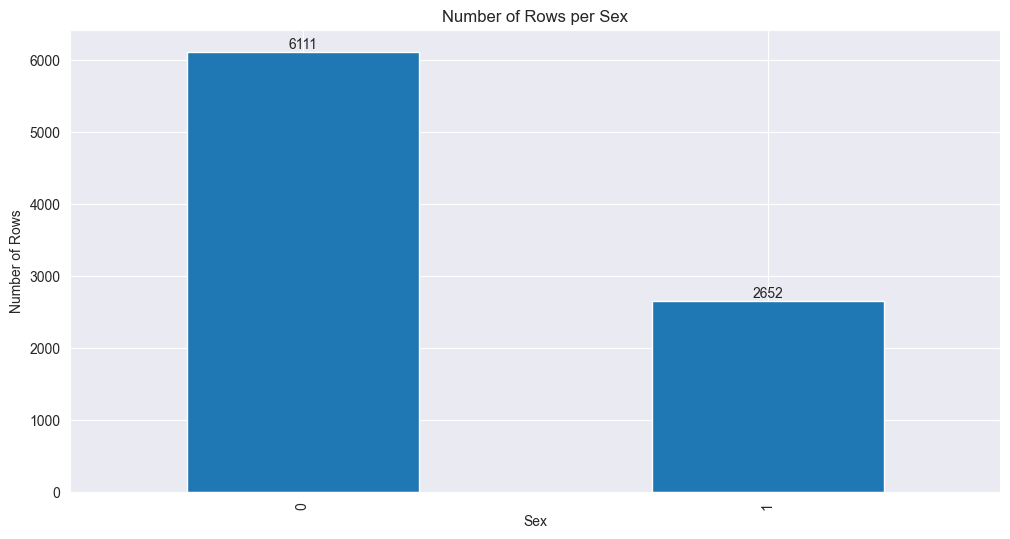

In [1263]:
sex_counts = data['Sex'].value_counts()
sex_counts = sex_counts.sort_index()
plt.figure(figsize=(12, 6))
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Sex')
for i, count in enumerate(sex_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is not well-balanced since there are more than twice as many males as females*

##### Link with Heart Attack Risk

In [1264]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Sex'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

       No Risk       Risk
Sex                      
0    64.081165  35.918835
1    64.404223  35.595777


Among the data we have studied, we note that gender has no influence on the risk of heart attack. It is difficult to confirm or refute this with scientific data, as some say that neither sex has a greater chance, others say that women have a greater risk and others lean more towards men. However, since we have to make a decision, we have decided to leave this attribute out of our project, as the data does not show it to be significant and numerous articles found on the internet confirm it.

In [1265]:
data = data.drop("Sex", axis=1)

#### Blood Pressure column
##### Type

In [1266]:
print(data['Blood Pressure'].dtype)
blood_pressure = data['Blood Pressure'].unique()
print(blood_pressure)

object
['158/88' '165/93' '174/99' ... '137/94' '94/76' '119/67']


*Blood Pressure has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: 

*  systolic <120 mmHg and <80 mmHg Normal
*  systolic 120-129 mmHg and <80 mmHg Elevated
*  systolic 130-139 mmHg or	80-89 mmHg Hypertension stage 1
*  systolic ≥140 mmHg or ≥90 mmHg Hypertension stage 2

In [1267]:
# Make Blood Pressure numerical
#Sample blood pressure values in the format "systolic/diastolic"
blood_pressure_values = data['Blood Pressure'].astype(str).tolist()

# Function to categorize blood pressure values
def categorize_blood_pressure(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        if systolic < 120 and diastolic < 80:
            return 0
        elif systolic < 129 and diastolic < 80:
            return 1
        elif systolic < 139 or (80 < diastolic < 90):
            return 2
        elif systolic > 140 or diastolic > 90:
            return 3
    except (ValueError, AttributeError):
        # Handle unexpected or missing data
        return -1  # You can assign a special value for such cases

# Applying the function to the blood pressure values
categorized_blood_pressure = [categorize_blood_pressure(bp) for bp in blood_pressure_values]

# Replace the original 'Blood Pressure' column with categorized blood pressure values
data['Blood Pressure'] = categorized_blood_pressure

##### Senseless values and Repartition

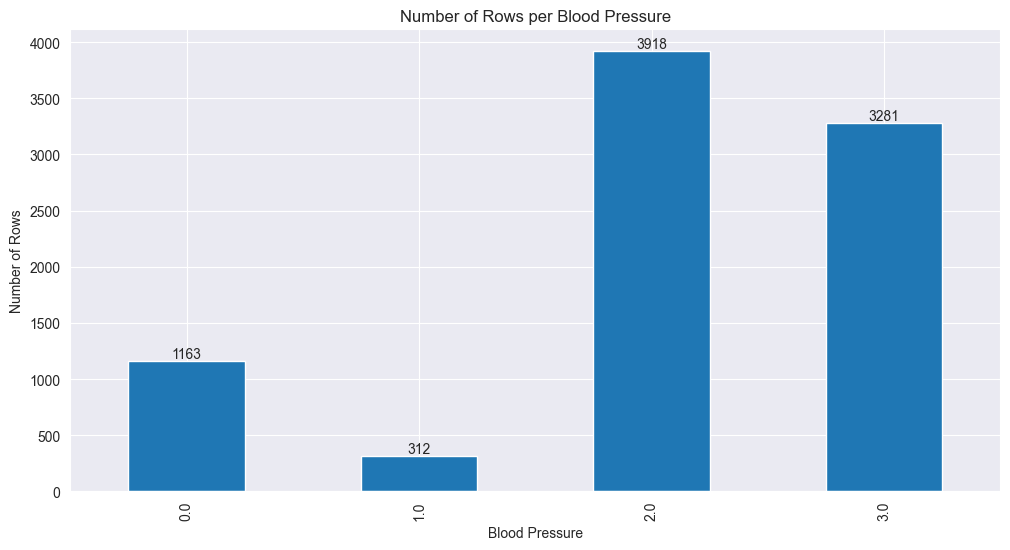

In [1268]:
blood_pressure_counts = data['Blood Pressure'].value_counts()
blood_pressure_counts = blood_pressure_counts.sort_index()
plt.figure(figsize=(12, 6))
blood_pressure_counts.plot(kind='bar')
plt.xlabel('Blood Pressure')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Blood Pressure')
for i, count in enumerate(blood_pressure_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the blood pressure column has no senseless values, since these are 3 correct values.
The repartition between the 4 categories is not well-balanced since 2 and 3 are much more represented than 0 and 1*

##### Link with heart attack risk

In [1269]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Blood Pressure'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                  No Risk       Risk
Blood Pressure                      
0.0             64.058469  35.941531
1.0             69.230769  30.769231
2.0             63.910158  36.089842
3.0             64.035355  35.964645


*Not surprisingly, hypertension is associated with a higher risk of heart attack.
But these are not very big differences either.*
#### Heart Rate column
##### Type

In [1270]:
print(data['Heart Rate'].dtype)
heart_rate = data['Heart Rate'].unique()
print(heart_rate)

int64
[ 72  98  73  93  48  84 107  68  55  97  70  85 102  40  56 104  71  69
  66  81  52 105  96  74  49  45  50  46  44 106  83  86  65 101  51  43
  79  90  94  78  92  54 109  61  64  82 110  42  63  41 100  76  75  58
  53  60  77  47  59  57  87  67  88  99  80  95 108  89  62 103  91]


*Heart Rate has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: *

TODO

In [1271]:
# TODO Create heart rate categories

##### Senseless values and repartition

In [1272]:
# TODO

TODO interpretation

##### Link with heart attack risk

In [1273]:
# TODO

TODO interpretation

#### Cholesterol column
##### Type

In [1274]:
print(data['Cholesterol'].dtype)
cholesterol = data['Cholesterol'].unique()
print(cholesterol)

int64
[208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 150 131 272 302 337 170 356 274 188 125 138
 376 181 184 275 394 128 217 399 283 289 284 327 262 212 350 385 162 141
 361 244 295 287 144 354 363 352 140 196 172 319 325 331 392 147 187 346
 286 151 300 165 343 366 317 386 158 157 242 241 365 257 348 175 298 269
 267 397 310 341 204 127 290 280 132 322 179 199 143 312 288 395 189 156
 238 381 391 355 210 400 260 235 167 256 249 

*Cholesterol has a numerical type which is what we want.
But since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories: 
- Less than 200mg/dL Desirable
- 200-239 mg/dL Borderline high
- 240mg/dL and above High*

In [1275]:
cholesterol_values = data['Cholesterol']

# Function to categorize blood pressure values
def categorize_cholesterol(ch):
    try:
        if ch < 200:
            return 0
        elif ch < 240:
            return 1
        else:
            return 2
    except (ValueError, AttributeError):
        # Handle unexpected or missing data
        return -1  # You can assign a special value for such cases

# Applying the function to the cholesterol values
categorized_cholesterol = [categorize_cholesterol(ch) for ch in cholesterol_values]

# Replace the original 'Cholesterol' column with categorized cholesterol values
data['Cholesterol'] = categorized_cholesterol

##### Senseless values and repartition

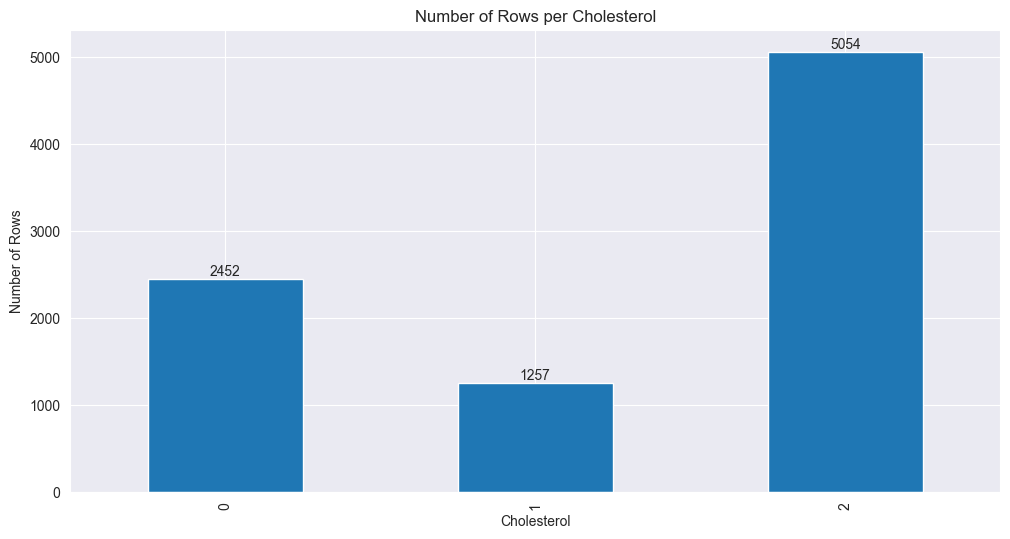

In [1276]:
cholesterol_counts = data['Cholesterol'].value_counts()
cholesterol_counts = cholesterol_counts.sort_index()
plt.figure(figsize=(12, 6))
cholesterol_counts.plot(kind='bar')
plt.xlabel('Cholesterol')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Cholesterol')
for i, count in enumerate(cholesterol_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the cholesterol column has no senseless values, since these are 3 correct values
The repartition between the 3 categories is not well-balanced since there are more than twice as many 2 as 0, and even less values in category 1*

##### Link with heart attack risk

In [1277]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Cholesterol'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

               No Risk       Risk
Cholesterol                      
0            65.660685  34.339315
1            63.961814  36.038186
2            63.514048  36.485952


TODO INTERPREATION

#### Family History column
##### Type and senseless values

In [1278]:
print(data['Family History'].dtype)
family_history = data['Family History'].unique()
print(family_history)

int64
[0 1]


*Family History has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

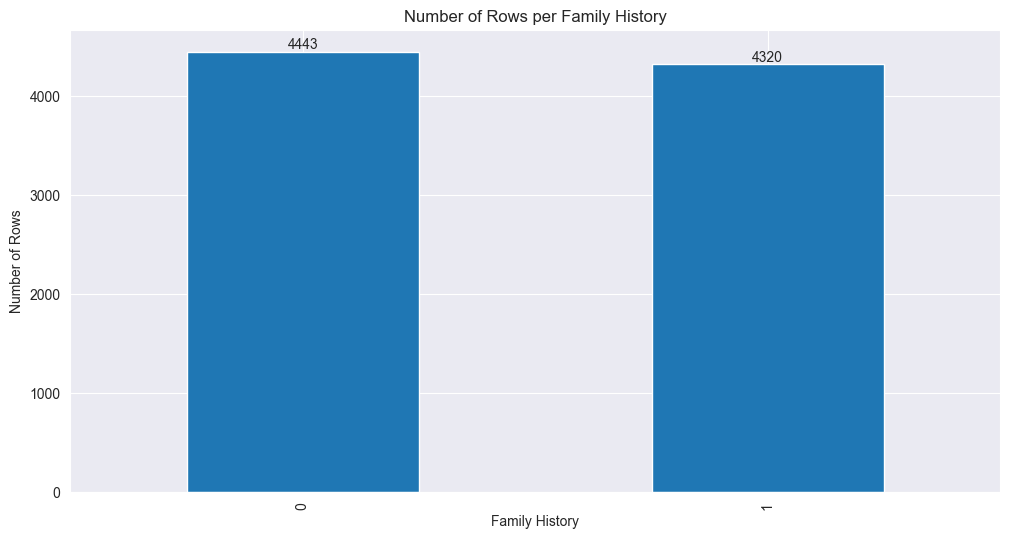

In [1279]:
family_history_counts = data['Family History'].value_counts()
family_history_counts = family_history_counts.sort_index()
plt.figure(figsize=(12, 6))
family_history_counts.plot(kind='bar')
plt.xlabel('Family History')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Family History')
for i, count in enumerate(family_history_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 cateogories is well-balanced*

##### Link with heart attack risk

In [1280]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Family History'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                  No Risk       Risk
Family History                      
0               64.100833  35.899167
1               64.259259  35.740741


TODO INTERPREATION

#### Smoking column
##### Type and Senseless values

In [1281]:
print(data['Smoking'].dtype)
smoking = data['Smoking'].unique()
print(smoking)

int64
[1 0]


*Smoking has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

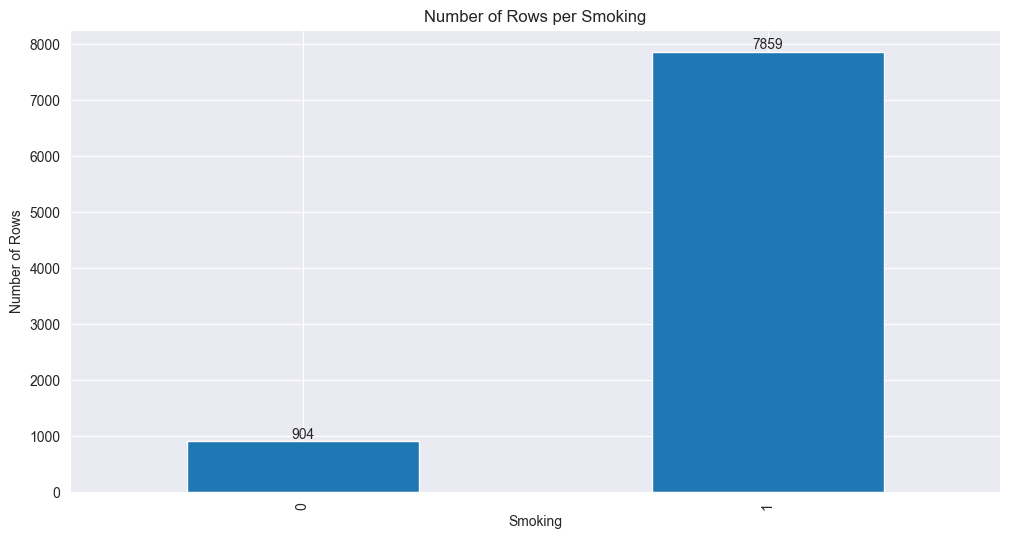

In [1282]:
smoking_counts = data['Smoking'].value_counts()
smoking_counts = smoking_counts.sort_index()
plt.figure(figsize=(12, 6))
smoking_counts.plot(kind='bar')
plt.xlabel('Smoking')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Smoking')
for i, count in enumerate(smoking_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

In [1283]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Smoking'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

           No Risk       Risk
Smoking                      
0        63.606195  36.393805
1        64.244815  35.755185


#### Obesity column
##### Type and Senseless values

In [1284]:
print(data['Obesity'].dtype)
obesity = data['Obesity'].unique()
print(obesity)

int64
[0 1]


*Obesity has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

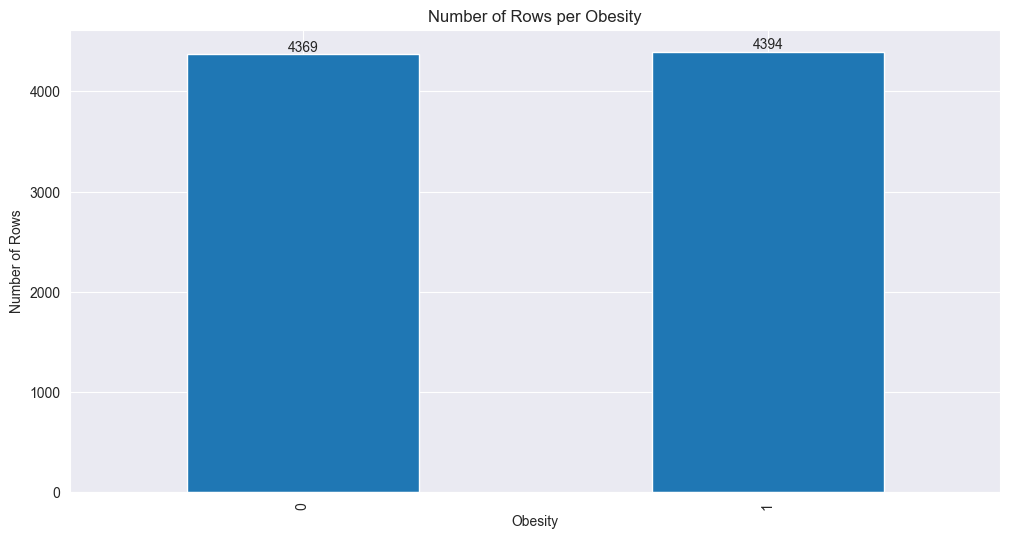

In [1285]:
obesity_counts = data['Obesity'].value_counts()
obesity_counts = obesity_counts.sort_index()
plt.figure(figsize=(12, 6))
obesity_counts.plot(kind='bar')
plt.xlabel('Obesity')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Obesity')
for i, count in enumerate(obesity_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

In [1286]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Obesity'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

           No Risk       Risk
Obesity                      
0        63.538567  36.461433
1        64.815658  35.184342


#### Alcohol Consumption column
##### Type and Senseless values

In [1287]:
print(data['Alcohol Consumption'].dtype)
alcohol_consumption = data['Alcohol Consumption'].unique()
print(alcohol_consumption)

int64
[0 1]


*Alcohol Consumption has a numerical type which is what we want.
We can note that the family history column has no senseless values, since these are 2 correct values*
##### Repartition

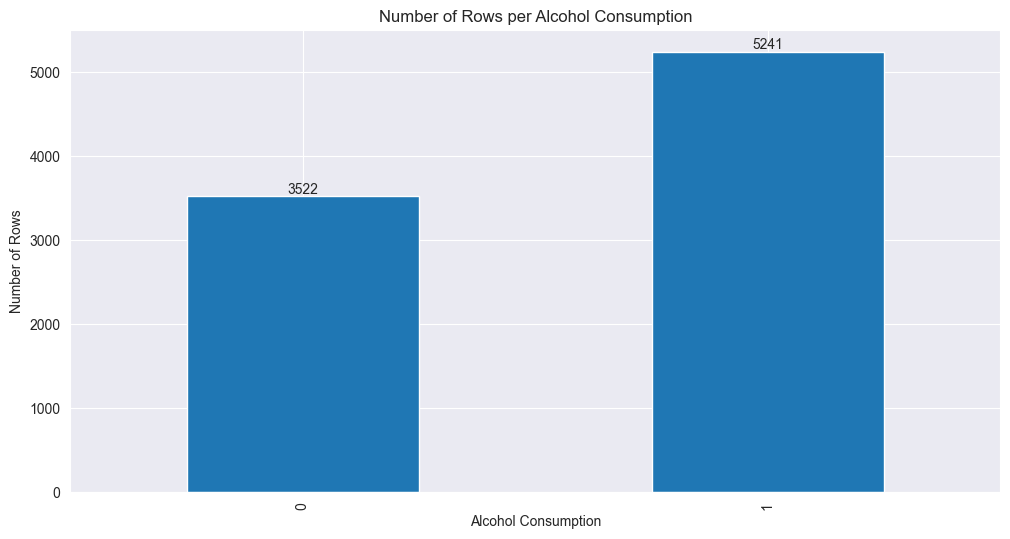

In [1288]:
alcohol_consumption_counts = data['Alcohol Consumption'].value_counts()
alcohol_consumption_counts = alcohol_consumption_counts.sort_index()
plt.figure(figsize=(12, 6))
alcohol_consumption_counts.plot(kind='bar')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Alcohol Consumption')
for i, count in enumerate(alcohol_consumption_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

TODO INTERPRETATION
##### Link with heart attack risk

In [1289]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Alcohol Consumption'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                       No Risk       Risk
Alcohol Consumption                      
0                    63.373083  36.626917
1                    64.720473  35.279527


#### Exercise Hours Per Week column
##### Type

In [1290]:
print(data['Exercise Hours Per Week'].dtype)

float64


TODO INTERPRETATION

*Since there are so many values and the important thing is the number in general and not so many in particular, we're going to create categories:
- Sedentary: Less than 1 hour per week.
- Lightly Active: 1 to 3 hours per week.
- Moderately Active: 4 to 6 hours per week.
- Very Active: 7 to 10 hours per week.
- Extremely Active: More than 10 hours per week.*

In [1291]:
# TODO exercice hours per week in categories

TODO INTERPRETATION

##### Senseless values and repartition

In [1292]:
# TODO

##### Link with heart attack risk

In [1293]:
#TODO

#### Diet column
##### Type and Senseless values

In [1294]:
print(data['Diet'].dtype)
diet = data['Diet'].unique()
print(diet)

object
['Average' 'Unhealthy' 'Healthy']


*We can note that the family history column has no senseless values, since these are 3 correct values*

In [1295]:
# Make Diet numerical
diet = data['Diet'].unique()
# Create an empty dictionary to store the mapping
diet_mapping = {}

# Iterate over unique diets and assign numerical values
for i in range(len(diet)):
    diet_mapping[diet[i]] = i

# Map the 'Diet' column using the created mapping
data['Diet'] = data['Diet'].map(diet_mapping)
print(data['Diet'][:15])

0     0
1     1
2     2
3     0
4     1
5     1
6     2
7     0
8     0
9     1
10    0
11    0
12    1
13    2
14    1
Name: Diet, dtype: int64


##### Repartition

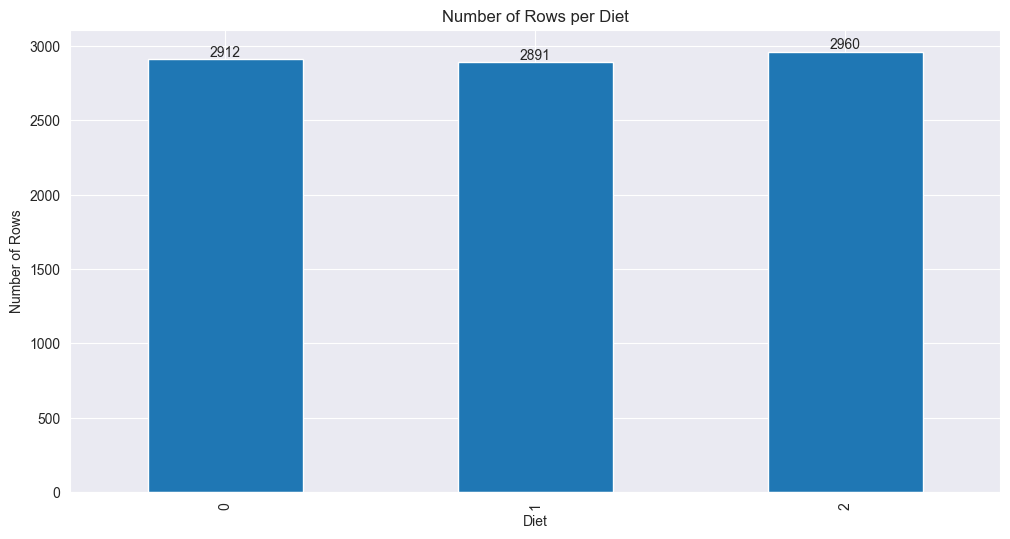

In [1296]:
diet_counts = data['Diet'].value_counts()
diet_counts = diet_counts.sort_index()
plt.figure(figsize=(12, 6))
diet_counts.plot(kind='bar')
plt.xlabel('Diet')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Diet')
for i, count in enumerate(diet_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*We can note that the diet column has no senseless values, since these are 3 correct values<br>
Also, the repartition between the 3 categories is balanced*

##### Link with heart attack risk

In [1297]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Diet'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

        No Risk       Risk
Diet                      
0     64.766484  35.233516
1     64.233829  35.766171
2     63.547297  36.452703


#### Previous Heart Problems column
##### Type and senseless values

In [1298]:
print(data['Previous Heart Problems'].dtype)
previous_heart_problems = data['Previous Heart Problems'].unique()
print(previous_heart_problems)

int64
[0 1]


*We can note that the Previous Heart column has no senseless values, since these are 2 correct values*
##### Repartition

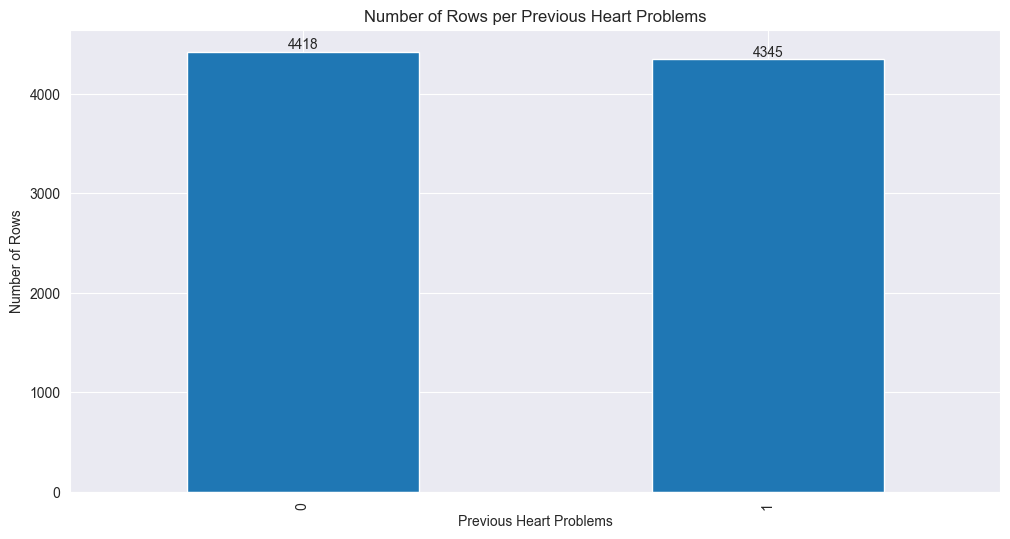

In [1299]:
previous_heart_problems_counts = data['Previous Heart Problems'].value_counts()
previous_heart_problems_counts = previous_heart_problems_counts.sort_index()
plt.figure(figsize=(12, 6))
previous_heart_problems_counts.plot(kind='bar')
plt.xlabel('Previous Heart Problems')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Previous Heart Problems')
for i, count in enumerate(previous_heart_problems_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is balanced*

##### Link with heart attack risk

In [1300]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Previous Heart Problems'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                           No Risk       Risk
Previous Heart Problems                      
0                        64.191942  35.808058
1                        64.165708  35.834292


#### Medication Use column
#####Type

In [1301]:
print(data['Medication Use'].dtype)
medication_use = data['Medication Use'].unique()
print(medication_use)

int64
[0 1]


*We can note that the Medication Use column has no senseless values, since these are 2 correct values*
##### Repartition

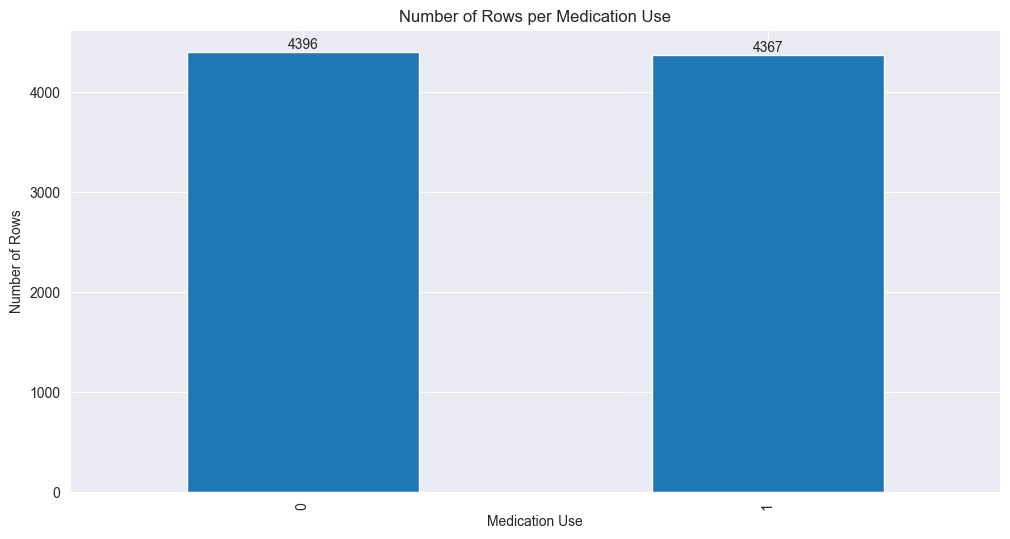

In [1302]:
medical_use_counts = data['Medication Use'].value_counts()
medical_use_counts = medical_use_counts.sort_index()
plt.figure(figsize=(12, 6))
medical_use_counts.plot(kind='bar')
plt.xlabel('Medication Use')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Medication Use')
for i, count in enumerate(medical_use_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is balanced*

##### Link with heart attack risk

In [1303]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Medication Use'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                  No Risk       Risk
Medication Use                      
0               64.285714  35.714286
1               64.071445  35.928555


#### Stress Level column
#####Type

In [1304]:
print(data['Stress Level'].dtype)
stress_level = data['Stress Level'].unique()
print(stress_level)

int64
[ 9  1  6  2  7  4  5  8 10  3]


*We can note that the Stress Level column has no senseless values, since these are 10 correct values*
##### Repartition

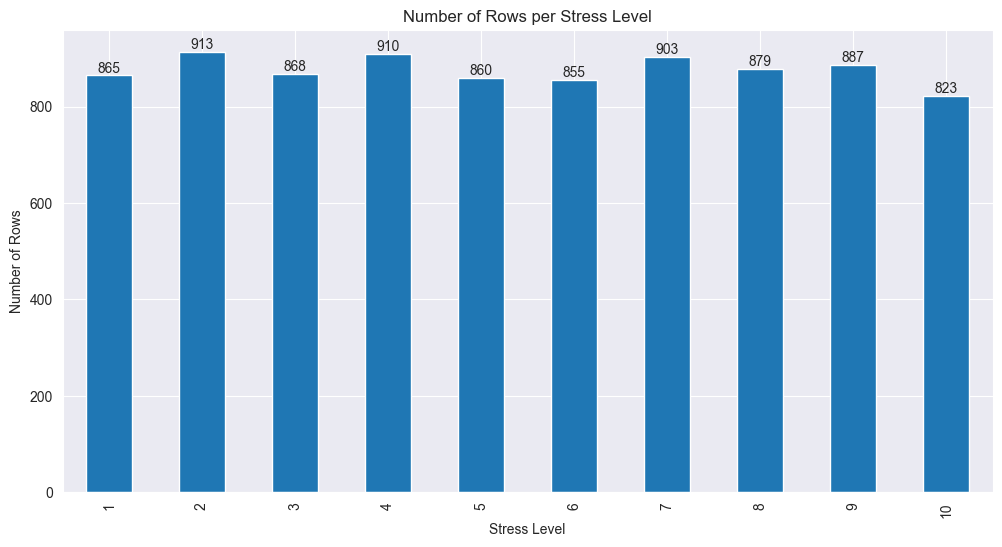

In [1305]:
stress_level_counts = data['Stress Level'].value_counts()
stress_level_counts = stress_level_counts.sort_index()
plt.figure(figsize=(12, 6))
stress_level_counts.plot(kind='bar')
plt.xlabel('Stress Level')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Stress Level')
for i, count in enumerate(stress_level_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

*The repartition between the 2 categories is fairly evenly balanced*

##### Link with heart attack risk

In [1306]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Stress Level'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

                No Risk       Risk
Stress Level                      
1             64.971098  35.028902
2             63.855422  36.144578
3             63.479263  36.520737
4             65.604396  34.395604
5             63.139535  36.860465
6             62.339181  37.660819
7             62.790698  37.209302
8             64.618885  35.381115
9             65.839910  34.160090
10            65.127582  34.872418


#### Sedentary Hours Per Day column
#####Type

#### Income column
#####Type

#### BMI column
#####Type

#### Triglycerides column
#####Type

#### Physical Activity Days Per Week column
#####Type

#### Sleep Hours Per Day column
#####Type

#### Country column
##### Type and senseless values

In [1307]:
print(data['Country'].dtype)
country = data['Country'].unique()
print(country)

object
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']


**We can note that the country column has no senseless values, since these are 20 correct values**

In [1308]:
#make Country numerical
country = data['Country'].unique()
# Create an empty dictionary to store the mapping
country_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(country)):
    country_mapping[country[i]] = i

# Map the 'Country' column using the created mapping
data['Country'] = data['Country'].map(country_mapping)
print(data.head())

   Age  Cholesterol  Blood Pressure  Heart Rate  Diabetes  Family History  \
0   67            1             2.0          72         0               0   
1   21            2             3.0          98         1               1   
2   21            2             3.0          72         1               0   
3   84            2             3.0          73         1               1   
4   66            2             2.0          93         1               1   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        1        0                    0                 4.168189  ...   
1        1        1                    1                 1.813242  ...   
2        0        0                    0                 2.078353  ...   
3        1        0                    1                 9.828130  ...   
4        1        1                    0                 5.804299  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  

##### Repartition

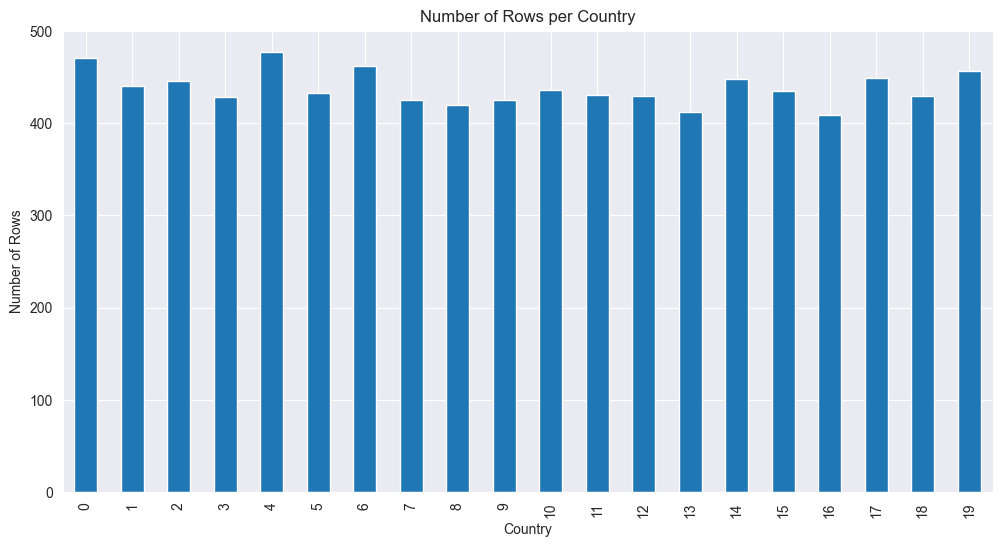

In [1309]:
country_counts = data['Country'].value_counts()
country_counts = country_counts.sort_index()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Country')
plt.show()

##### Link with heart attack risk

In [1310]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Country'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

           No Risk       Risk
Country                      
0        63.057325  36.942675
1        64.090909  35.909091
2        64.798206  35.201794
3        62.383178  37.616822
4        63.941300  36.058700
5        66.743649  33.256351
6        64.718615  35.281385
7        66.117647  33.882353
8        60.476190  39.523810
9        65.176471  34.823529
10       64.449541  35.550459
11       68.445476  31.554524
12       65.116279  34.883721
13       68.689320  31.310680
14       60.267857  39.732143
15       65.287356  34.712644
16       60.146699  39.853301
17       62.583519  37.416481
18       62.237762  37.762238
19       64.989059  35.010941


#### Continent column
##### Type and senseless values

In [1311]:
print(data['Continent'].dtype)
continent = data['Continent'].unique()
print(continent)

object
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']


*We can note that the continent column has no senseless values, since these are 6 correct values*

In [1312]:
# make continent numerical
continent = data['Continent'].unique()
# Create an empty dictionary to store the mapping
continent_mapping = {}
# Iterate over unique countries and assign numerical values
for i in range(len(continent)):
    continent_mapping[continent[i]] = i

# Map the 'Continent' column using the created mapping
data['Continent'] = data['Continent'].map(continent_mapping)

##### Repartition

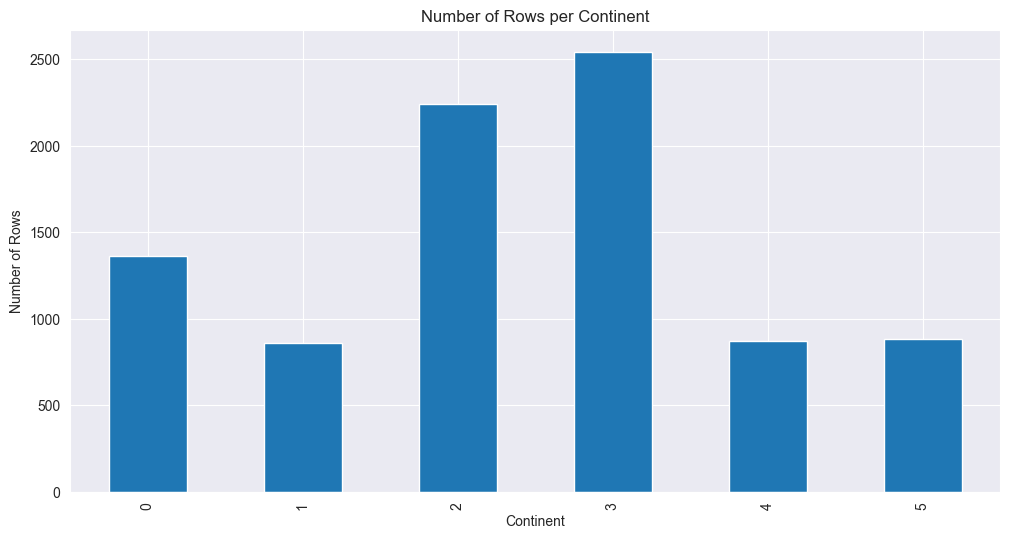

In [1313]:
continent_counts = data['Continent'].value_counts()
continent_counts = continent_counts.sort_index()
plt.figure(figsize=(12, 6))
continent_counts.plot(kind='bar')
plt.xlabel('Continent')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Continent')
plt.show()

##### Link with heart attack risk

In [1314]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Continent'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

             No Risk       Risk
Continent                      
0          63.362702  36.637298
1          62.325581  37.674419
2          65.417224  34.582776
3          64.608730  35.391270
4          63.115693  36.884307
5          63.914027  36.085973


#### Hemisphere column
##### Type and Senseless values

In [1315]:
print(data['Hemisphere'].dtype)
hemisphere = data['Hemisphere'].unique()
print(hemisphere)

object
['Southern Hemisphere' 'Northern Hemisphere']


*We can note that the continent column has no senseless values, since these are 2 correct values*

In [1316]:
#make hemisphere numerical
hemisphere = data['Hemisphere'].unique()
# Create an empty dictionary to store the mapping
hemisphere_mapping = {}
# Iterate over unique hemiphere and assign numerical values
for i in range(len(hemisphere)):
    hemisphere_mapping[hemisphere[i]] = i

# Map the 'Hemisphere' column using the created mapping
data['Hemisphere'] = data['Hemisphere'].map(hemisphere_mapping)

##### Repartition

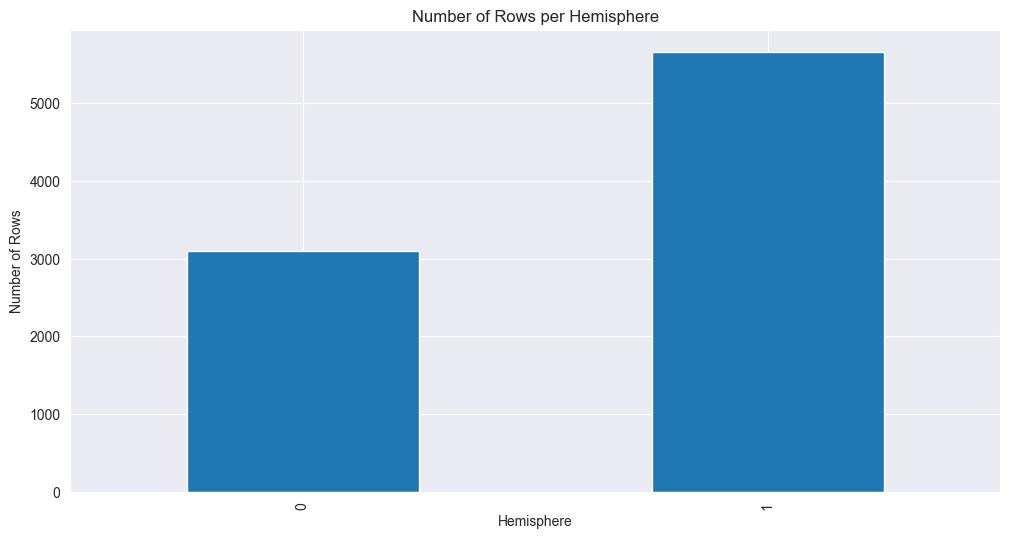

In [1317]:
hemisphere_counts = data['Hemisphere'].value_counts()
hemisphere_counts = hemisphere_counts.sort_index()
plt.figure(figsize=(12, 6))
hemisphere_counts.plot(kind='bar')
plt.xlabel('Hemisphere')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Hemisphere')
plt.show()

##### Link with heart attack risk

In [1318]:
df = pd.DataFrame(data)
cross_tab = pd.crosstab(df['Hemisphere'], df['Heart Attack Risk'], normalize='index') * 100
cross_tab.columns = ['No Risk', 'Risk']
print(cross_tab)

              No Risk       Risk
Hemisphere                      
0           65.001611  34.998389
1           63.727915  36.272085


#### Heart Attack Risk column

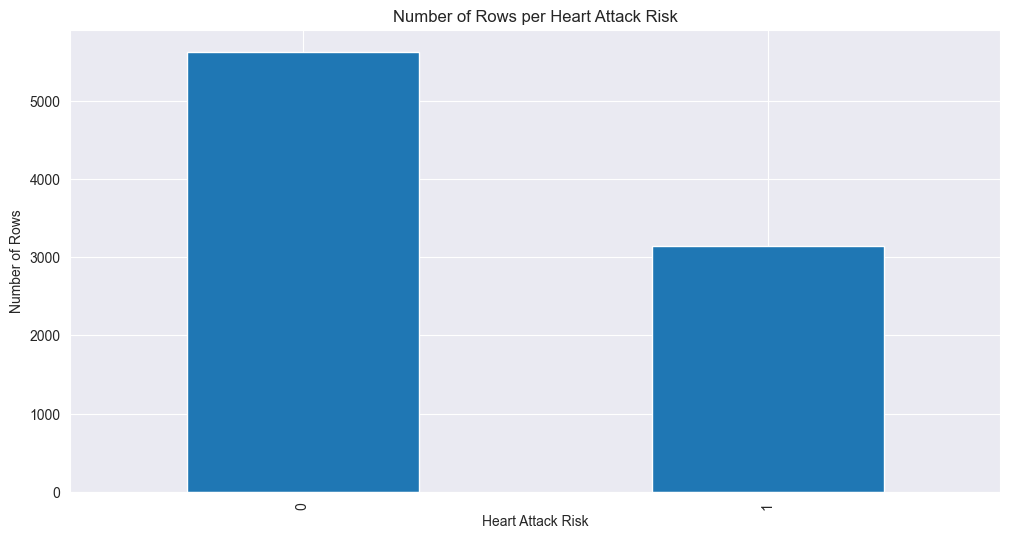

In [1319]:
heart_attack_counts = data['Heart Attack Risk'].value_counts()
heart_attack_counts = heart_attack_counts.sort_index()
plt.figure(figsize=(12, 6))
heart_attack_counts.plot(kind='bar')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Heart Attack Risk')
plt.show()

*The dataset is not balanced (take it into account later)*

### Verification of our dataset

In [1320]:
print(data.dtypes)

Age                                  int64
Cholesterol                          int64
Blood Pressure                     float64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                              int64
Continent                            int64
Hemisphere                           int64
Heart Attac

*It is all good, all we have now is digital data*

##### Correlation

                                      Age  Cholesterol  Blood Pressure  \
Age                              1.000000     0.003338       -0.009661   
Cholesterol                      0.003338     1.000000        0.007185   
Blood Pressure                  -0.009661     0.007185        1.000000   
Heart Rate                      -0.003844     0.002170       -0.000428   
Diabetes                        -0.014105    -0.011824       -0.002521   
Family History                   0.008353    -0.018420       -0.007111   
Smoking                          0.394891     0.021582       -0.008932   
Obesity                         -0.008140    -0.007476       -0.001278   
Alcohol Consumption             -0.006666     0.001803        0.004608   
Exercise Hours Per Week          0.001206     0.027204       -0.008274   
Diet                            -0.011114    -0.001631        0.007149   
Previous Heart Problems          0.000868    -0.006552        0.001832   
Medication Use                   0.000

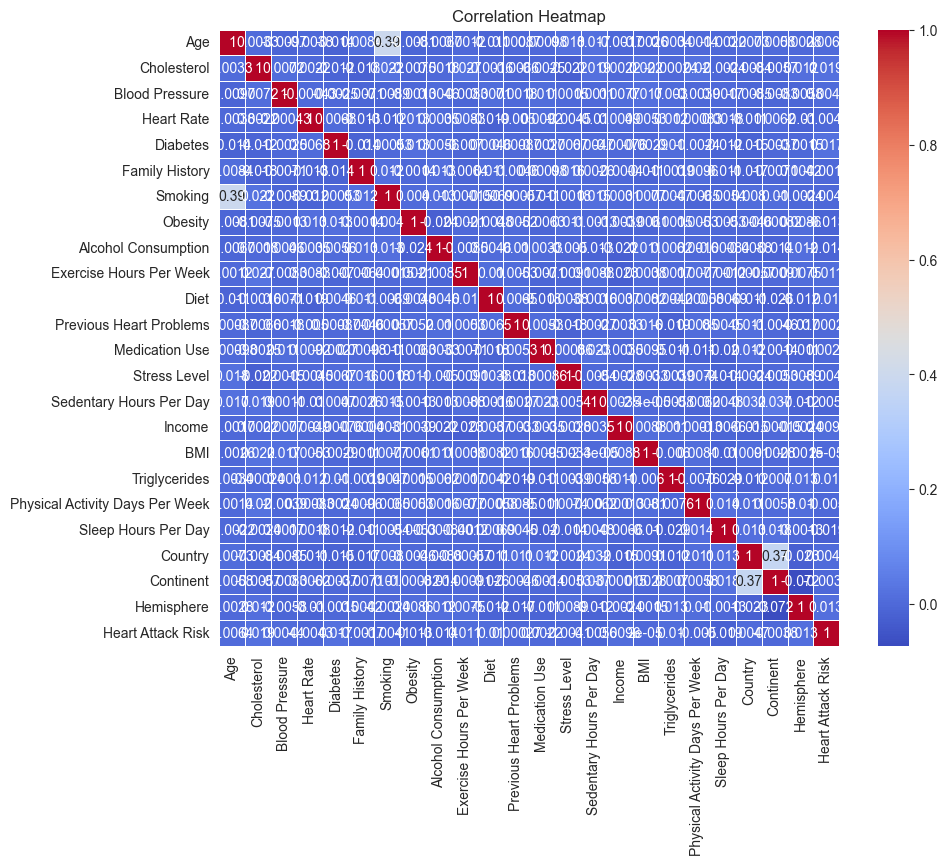

In [1321]:
correlation_matrix = data.corr()
print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()